### 오픈 API
- 국가, 지방자치 단체 등 다양한 기관에서 자신이 관리하고 있는 서버(왕 컴퓨터)에서 제공하는 정보를 일정한 절차를 걸치면 접근할 수 있도록 개방한 서비스 내용
- 예 : 보건복지부 (코로나 19 시도별, 일별 확진자, 나이스 교육정보 (급식), 문화 데이터 광장 박스포이스 데이터)

https://www.culture.go.kr/data/openapi/openapiView.do?id=435&category=A&gubun=A

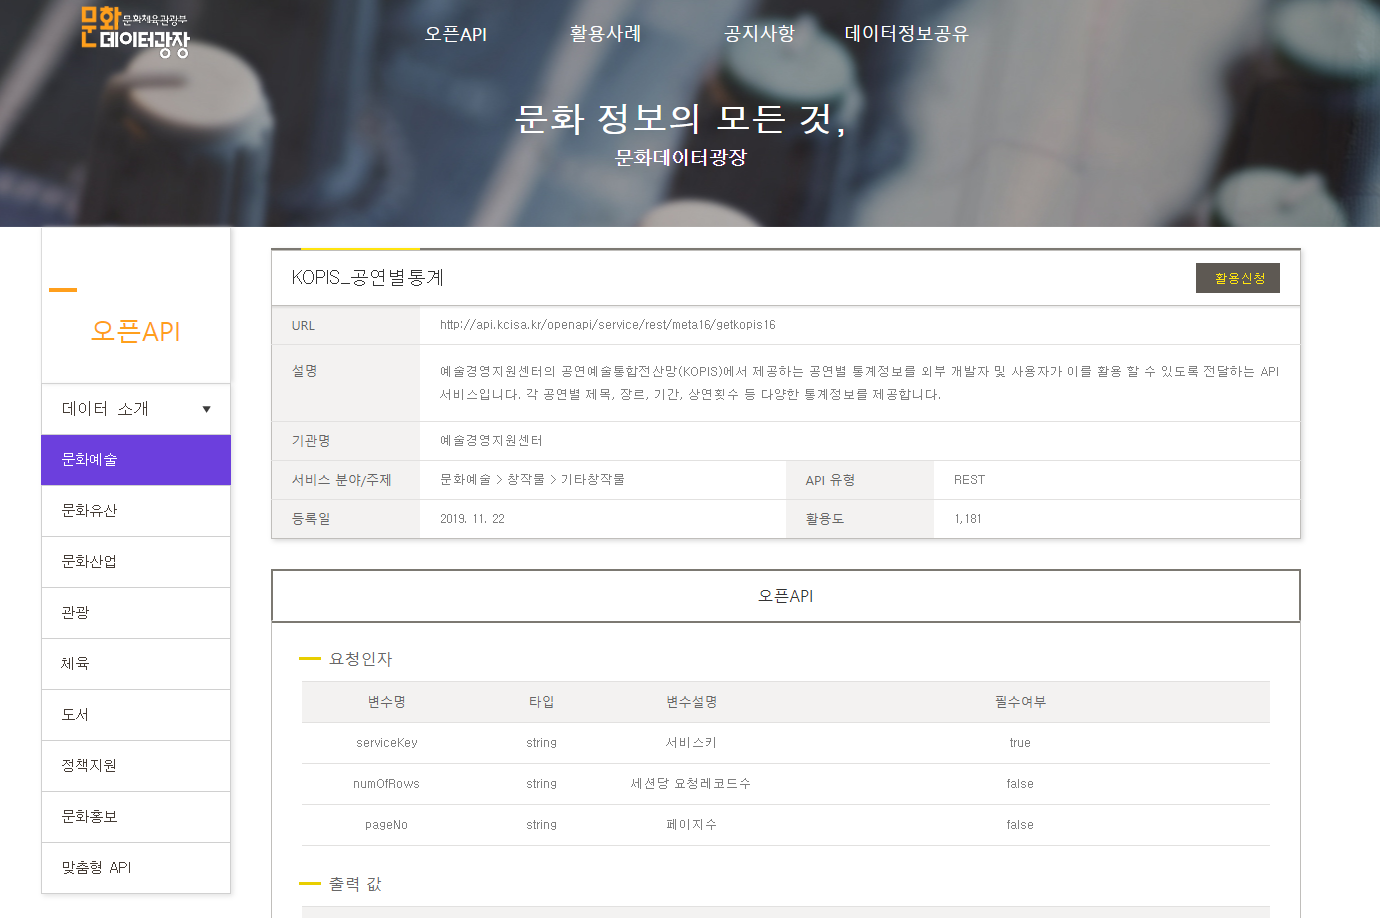

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import re
import requests, bs4
import resource
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode
from xml.etree import ElementTree as ET
from datetime import datetime, timedelta, date

# Service URL

xmlUrl = 'http://api.kcisa.kr/openapi/service/rest/meta16/getkopis16'
My_API_Key = unquote('74133788-f84c-466c-bc68-f12c0021a01e') ## 본인의 키를 문화데이터 광장에서 입력(입력필요) -> 자신의 키로 바꿔도 됨 

queryParams = '?' + urlencode(
         {
            quote_plus('serviceKey') : My_API_Key,
            quote_plus('numOfRows') : 10,
        }
    )

print(xmlUrl + queryParams)


http://api.kcisa.kr/openapi/service/rest/meta16/getkopis16?serviceKey=74133788-f84c-466c-bc68-f12c0021a01e&numOfRows=10


In [10]:
import re
import requests, bs4
import resource
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import unquote, quote_plus, urlencode
from xml.etree import ElementTree as ET
from datetime import datetime, timedelta, date


# Service URL

xmlUrl = 'http://api.kcisa.kr/openapi/service/rest/meta16/getkopis16'
My_API_Key = unquote('74133788-f84c-466c-bc68-f12c0021a01e') ## 본인의 키를 공공데이터포털에서 받아서 입력(입력필요) -> 자신의 키로 바꿔도 됨 
f=open("/content/gdrive/MyDrive/PL/show-infor.csv",'w',encoding='cp949') ## 자신이 원하는 이름을 입력하기 encoding을 cp949로 해야 한글이 깨지지 않음.
f.write("공연이름"+","+"공연종류"+","+"상연횟수"+","+"공연장소"+","+"공연날짜" +"\n") ##데이터 제목 파일에 입력하기 \


for i in range(210):
  queryParams = '?' + urlencode(
          {
              quote_plus('serviceKey') : My_API_Key,
              quote_plus('numOfRows') : 1000,
              quote_plus('pageNo') : i
          }
      )

#print(xmlUrl + queryParams)
  response = requests.get(xmlUrl + queryParams).text
  root = ET.fromstring(response)
  items = root.findall('body/items/item')

  try:
    for item in items:
      title = item.find('title').text
      title = title.replace(',','') #,를 기준으로 값들이 구분되기 때문에 제목에 있는 ,를 공백으로 바꿔줌
      typ = item.find('subjectCategory').text
      typ = typ.replace(',','') #,를 기준으로 값들이 구분되기 때문에 제목에 있는 ,를 공백으로 바꿔줌
      number = item.find('extent').text
      number = number.replace(',','') #,를 기준으로 값들이 구분되기 때문에 제목에 있는 ,를 공백으로 바꿔줌
      place = item.find('venue').text
      place = place.replace(',','') #,를 기준으로 값들이 구분되기 때문에 제목에 있는 ,를 공백으로 바꿔줌
      period = item.find('period').text
      period = period.replace(',','')
      f.write(title+","+typ+","+number+","+place+","+period+"\n")
      print(title + " 기록 완료")

  except Exception as e:
      print(title,e)
f.close()


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
제39회 서울연극제 4four 기록 완료
창악회 창립 60주년 정기발표회Ⅰ 기록 완료
난타 [홍대] 기록 완료
죽여주는 이야기 기록 완료
락시터 [울산] 기록 완료
옥탑방 고양이 [대학로] 기록 완료
작업의 정석 1탄 기록 완료
난타 [명동] 기록 완료
페인터즈: 히어로 [종로] 기록 완료
멈춰진 계절 기록 완료
번더플로어 [울산] 기록 완료
솔리스츠 100콘서트 with 장필순 조동희 기록 완료
뭔가 멋진 일이 일어날거야 [고양] 기록 완료
떠있는 섬 기록 완료
Colour of Geomungo 기록 완료
제39회 서울연극제 깊게 자자 죽음의 문턱까지 기록 완료
제39회 서울연극제 충분히 애도되지 못한 슬픔 기록 완료
제39회 서울연극제 일상의 광기에 대한 이야기 기록 완료
동행 기록 완료
옥탑방고양이 [대구] 기록 완료
제39회 서울연극제 이혈 기록 완료
임대아파트 기록 완료
벚꽃동산 기록 완료
최수열의 고전두시 기록 완료
하이젠버그 기록 완료
그대라서 고마워요 기록 완료
두근두근 내 인생 기록 완료
두 여자 [대학로] 기록 완료
죽여주는 이야기 기록 완료
꽃보다 슈퍼스타 기록 완료
옥탑방 고양이 [대학로] 기록 완료
판타스틱 기록 완료
작업의 정석 1탄 기록 완료
난타 [명동] 기록 완료
안나라수마나라 기록 완료
대한민국 소극장열전 옥주 [광주] 기록 완료
대한민국 소극장열전 무림의 고수 [구미] 기록 완료
그리스의 연인들 기록 완료
소가 된 게으름뱅이 [금천] 기록 완료
망주석 재판 기록 완료
몽타주 [낙산] 기록 완료
메리골드 기록 완료
오! 금남식당 기록 완료
새빨간거짓말 기록 완료
트루라이즈 기록 완료
호비쇼 [서울양재] 기록 완료
죽여주는 이야기 기록 완료
빨래 기록 완료
극적인 하룻밤 기록 완료
작업의 정석 1탄 기록 완료
남진 어버이날 디너쇼 기록 완료
더픽션 기록 완료
러브액츄얼리 시즌2 [부산] 기록 완료
제6회 KCO 첼로 앙상블 정기연주회 기록 완료
제40회 서울연극제 단

In [12]:
#판다스 : 표 데이터를 다루는데 있어서 효과적인 도구
#공연전산망에 등록된 공연정보를 불러와 모습 확인 

import pandas as pd
import matplotlib.pyplot as plt

showtot = pd.read_csv("/content/gdrive/MyDrive/PL/show-infor.csv",encoding='cp949')
print(showtot.shape)

(195259, 5)


In [ ]:
#공연이름을 기준으로 내가 입력한 값을 포함한 공연 정보를 출력하기

likename = input('관심 있는 공연 이름을 입력하세요')

for i in showtot.index: #showtot를 i라는 이름으로 계속 돌면서
  if likename in showtot.loc[i,'공연이름']: 
    print(showtot.loc[i]) #그 선수의 데이터를 출력해라!

In [ ]:
# 문제 : 공연장소를 기준으로 내가 입력한 값을 포함하고 있는 공연 정보를 출력하기

In [15]:
#데이터 파일에 있는 공연의 고유 종류를 출력하기

print(showtot['공연종류'].unique())



['오페라' '복합' '연극' '뮤지컬' '콘서트' '국악' '클래식' '무용']


In [18]:
#위에 있는 종류 중 하나를 골라 그 종류의 공연 정보만 가지고 있는 데이터프레임(표)를 만들고 이를 파일로 저장하기

condition = showtot['공연종류']==''
mytyp = showtot[contition]
mytyp.to_csv('',index='True',encoding='cp949')

In [ ]:
# 다양한 종류의 오픈 API를 검색해 보고 위를 기반으로 오픈 API를 이용하여 정보를 파일로 저장하거나
# 이미 있는 엑셀 또는 CSV 파일을 이용하여 필요한 정보를 뽑아내는 프로그래밍을 자유롭게 수행해봅시다!




